In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# load test and train data
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
train_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
test_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,444628.000000,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301
std,36672.567411,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588
min,381110.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,412869.000000,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000
50%,444628.000000,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000
75%,476387.000000,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


In [6]:
print(train_df.shape), print(test_df.shape)

(381109, 12)
(127037, 11)


(None, None)

In [7]:
train_df.isnull().sum() # no null data found

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [13]:
train_df.dtypes

id                       int64
Gender                  object
Age                      int64
Driving_License          int64
Region_Code              int64
Previously_Insured       int64
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Vintage                  int64
Response                object
dtype: object

[Text(0.5, 1.0, 'Response Count')]

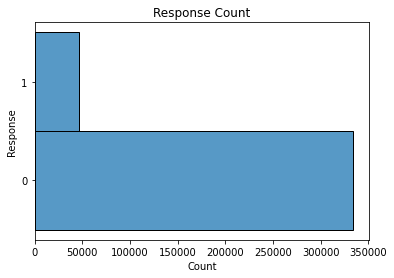

In [11]:
train_df['Response'] = train_df.Response.astype(str)
sns.histplot(data=train_df, y="Response").set(title = "Response Count")
# we can see the class imbalance

[Text(0.5, 1.0, 'Driving License Count')]

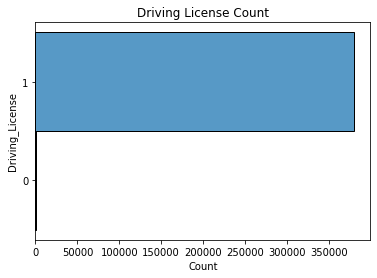

In [15]:
train_df['Driving_License'] = train_df.Driving_License.astype(str)
sns.histplot(data=train_df, y="Driving_License").set(title = "Driving License Count")

[Text(0.5, 1.0, 'Age vs. Annual Premium')]

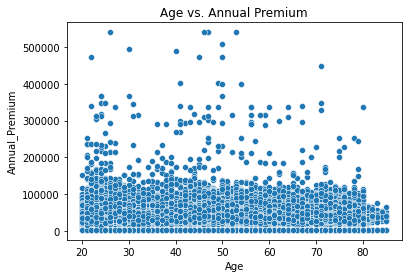

In [16]:
sns.scatterplot(data = train_df, x="Age", y="Annual_Premium").set(title = "Age vs. Annual Premium")

[Text(0.5, 1.0, 'Response vs. Age')]

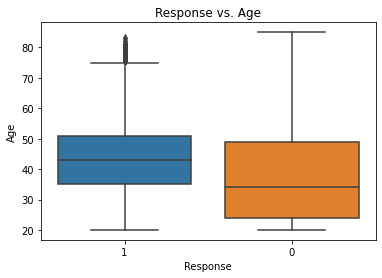

In [17]:
sns.boxplot(x="Response", y="Age", data=train_df).set(title = "Response vs. Age")

[Text(0.5, 1.0, 'Response vs. Policy Sales Channel')]

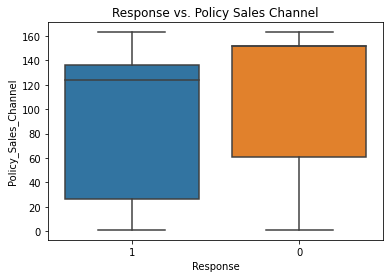

In [18]:
sns.boxplot(x="Response", y="Policy_Sales_Channel", data=train_df).set(title = "Response vs. Policy Sales Channel")

[Text(0.5, 1.0, 'Histogram of Region Codes for Each Response')]

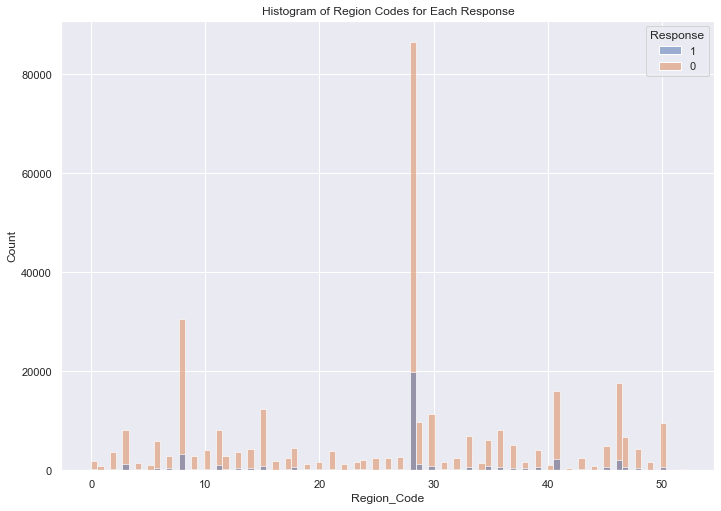

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=train_df, x="Region_Code", 
             hue = "Response").set(title = "Histogram of Region Codes for Each Response")

[Text(0.5, 1.0, 'Histogram of Previously Insured count for Each Response type')]

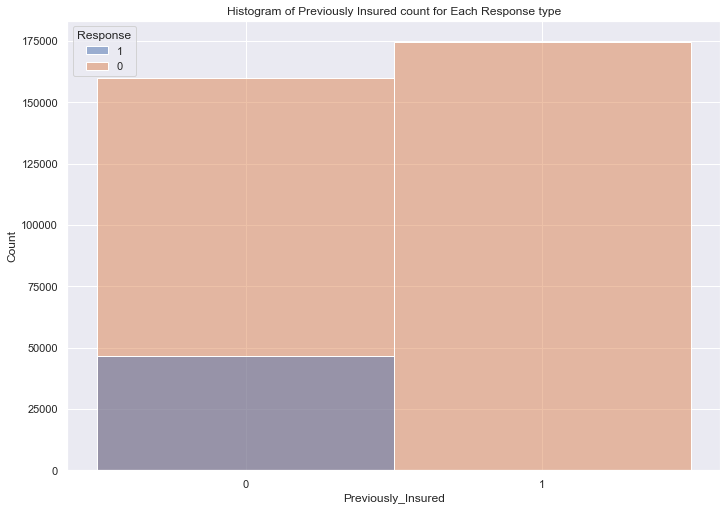

In [25]:
train_df['Previously_Insured'] = train_df.Previously_Insured.astype(str)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=train_df, x="Previously_Insured", 
             hue = "Response").set(title = "Histogram of Previously Insured count for Each Response type")
# none of the previously insured had a response 1, meaning previously insured customers are NOT interested

In [26]:
train_df.corr()

,id,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage
id,1.000000,0.001561,-0.000572,0.003027,-0.002837,-0.000630
Age,0.001561,1.000000,0.042574,0.067507,-0.577826,-0.001264
Region_Code,-0.000572,0.042574,1.000000,-0.010588,-0.042420,-0.002750
Annual_Premium,0.003027,0.067507,-0.010588,1.000000,-0.113247,-0.000608
Policy_Sales_Channel,-0.002837,-0.577826,-0.042420,-0.113247,1.000000,0.000002
Vintage,-0.000630,-0.001264,-0.002750,-0.000608,0.000002,1.000000


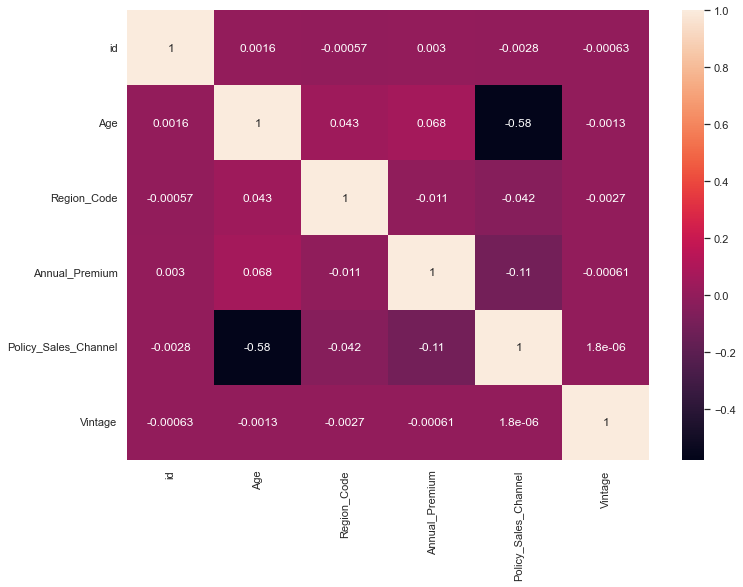

In [28]:
corrMatrix = train_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()